# Применить RandomForest. Оценить точность классификации.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Красное вино

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

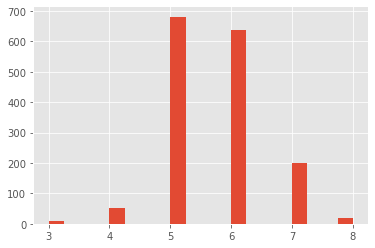

In [8]:
red[u'quality'].hist(bins = 20)

Белое вино

In [46]:
white = pd.read_csv('winequality-white.csv', sep=';')

In [47]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [49]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [50]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

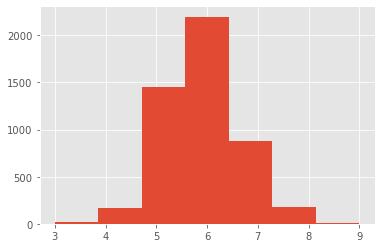

In [51]:
white[u'quality'].hist(bins = 7)

Общая таблица

In [52]:
redwhite = pd.concat([red, white])

<AxesSubplot:>

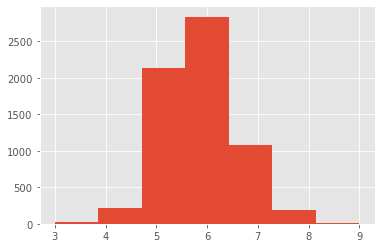

In [53]:
redwhite[u'quality'].hist(bins = 7)

In [54]:
#Красное вино
# Правильный ответ записываем в вектор y
y_red = red[u'quality']
# Удаляем колонку с правильным ответом
X_red = red.drop(u'quality', axis=1)

In [55]:
#Белое вино
# Правильный ответ записываем в вектор y
y_white = white[u'quality']
# Удаляем колонку с правильным ответом
X_white = white.drop(u'quality', axis=1)

In [56]:
#Красное и белое
# Правильный ответ записываем в вектор y
y_redwhite = redwhite[u'quality']
# Удаляем колонку с правильным ответом
X_redwhite = redwhite.drop(u'quality', axis=1)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [58]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

In [59]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, random_state=41,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

In [60]:
X_train_redwhite, X_test_redwhite, y_train_redwhite, y_test_redwhite = train_test_split(X_redwhite, y_redwhite, 
                                                                                        random_state=42,
                                                                                        # доля объёма тестового множества
                                                                                        test_size=0.2)

Модель для красного вина

In [61]:
model_red = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                                 )

In [62]:
model_red.fit(X_train_red, y_train_red)

RandomForestClassifier(max_depth=5, n_estimators=30, oob_score=True,
                       random_state=42)

In [24]:
y_pred_red = model_red.predict(X_test_red)
print(metrics.classification_report(y_pred_red, y_test_red, zero_division = True))

              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.73      0.64      0.68       149
           6       0.61      0.52      0.56       153
           7       0.24      0.56      0.33        18
           8       0.00      1.00      0.00         0

    accuracy                           0.58       320
   macro avg       0.26      0.79      0.26       320
weighted avg       0.64      0.58      0.60       320



In [63]:
conf_mat_red = metrics.confusion_matrix(y_test_red, y_pred_red)
conf_mat_red = pd.DataFrame(conf_mat_red, index=model_red.classes_, columns=model_red.classes_)
conf_mat_red

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,0,6,4,0,0
5,0,0,95,34,1,0
6,0,0,46,80,6,0
7,0,0,1,31,10,0
8,0,0,0,4,1,0


In [64]:
print('Accuracy train score: {:.5f}'.format(accuracy_score(model_red.predict(X_train_red), y_train_red)))
print('Accuracy test score: {:.5f}'.format(accuracy_score(y_test_red, y_pred_red)))
print('Out-of-bag score: {:.5f}'.format(model_red.oob_score_))

Accuracy train score: 0.69820
Accuracy test score: 0.57812
Out-of-bag score: 0.62158


In [65]:
pd.DataFrame({'feature': X_red.columns,
              'importance': model_red.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.276038
9,sulphates,0.130003
6,total sulfur dioxide,0.127747
1,volatile acidity,0.108967
7,density,0.085970
8,pH,0.056918
2,citric acid,0.050221
0,fixed acidity,0.049395
5,free sulfur dioxide,0.043129
4,chlorides,0.036267


Модель для белого вина

In [66]:
model_white = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=7,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                                 )

In [67]:
model_white.fit(X_train_white, y_train_white)

RandomForestClassifier(max_depth=7, n_estimators=30, oob_score=True,
                       random_state=42)

In [68]:
y_pred_white = model_white.predict(X_test_white)
print(metrics.classification_report(y_pred_white, y_test_white, zero_division = True))

              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.03      0.50      0.06         2
           5       0.62      0.66      0.64       277
           6       0.79      0.56      0.65       614
           7       0.29      0.62      0.39        86
           8       0.03      1.00      0.06         1
           9       0.00      1.00      0.00         0

    accuracy                           0.59       980
   macro avg       0.25      0.76      0.26       980
weighted avg       0.70      0.59      0.62       980



In [69]:
conf_mat_white = metrics.confusion_matrix(y_test_white, y_pred_white)
conf_mat_white = pd.DataFrame(conf_mat_white, index=model_white.classes_, columns=model_white.classes_)
conf_mat_white

,3,4,5,6,7,8,9
3,0,0,1,2,0,0,0
4,0,1,18,13,1,0,0
5,0,1,183,111,2,0,0
6,0,0,70,341,18,0,0
7,0,0,5,127,53,0,0
8,0,0,0,17,12,1,0
9,0,0,0,3,0,0,0


In [70]:
print('Accuracy train score: {:.5f}'.format(accuracy_score(model_white.predict(X_train_white), y_train_white)))
print('Accuracy test score: {:.5f}'.format(accuracy_score(y_test_white, y_pred_white)))
print('Out-of-bag score: {:.5f}'.format(model_white.oob_score_))

Accuracy train score: 0.66360
Accuracy test score: 0.59082
Out-of-bag score: 0.56866


In [71]:
pd.DataFrame({'feature': X_white.columns,
              'importance': model_white.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.208891
1,volatile acidity,0.129821
7,density,0.128297
3,residual sugar,0.078995
5,free sulfur dioxide,0.077213
6,total sulfur dioxide,0.075048
8,pH,0.066662
4,chlorides,0.066235
2,citric acid,0.064683
9,sulphates,0.053280


Модель для красного и белого

In [72]:
model_redwhite = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=50,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=8,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                                 )

In [73]:
model_redwhite.fit(X_train_redwhite, y_train_redwhite)

RandomForestClassifier(max_depth=8, n_estimators=50, oob_score=True,
                       random_state=42)

In [74]:
y_pred_redwhite = model_redwhite.predict(X_test_redwhite)
print (metrics.classification_report(y_pred_redwhite, y_test_redwhite, zero_division = True))

              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.66      0.61      0.63       434
           6       0.72      0.56      0.63       760
           7       0.30      0.61      0.40       106
           8       0.00      1.00      0.00         0
           9       0.00      1.00      0.00         0

    accuracy                           0.58      1300
   macro avg       0.24      0.83      0.24      1300
weighted avg       0.66      0.58      0.61      1300



In [75]:
conf_mat_redwhite = metrics.confusion_matrix(y_test_redwhite, y_pred_redwhite)
conf_mat_redwhite = pd.DataFrame(conf_mat_redwhite, index=model_redwhite.classes_, columns=model_redwhite.classes_)
conf_mat_redwhite

,3,4,5,6,7,8,9
3,0,0,2,4,0,0,0
4,0,0,22,21,0,0,0
5,0,0,265,135,2,0,0
6,0,0,140,429,28,0,0
7,0,0,5,145,65,0,0
8,0,0,0,26,10,0,0
9,0,0,0,0,1,0,0


In [76]:
print('Accuracy train score: {:.5f}'.format(accuracy_score(model_redwhite.predict(X_train_redwhite), y_train_redwhite)))
print('Accuracy test score: {:.5f}'.format(accuracy_score(y_test_redwhite, y_pred_redwhite)))
print('Out-of-bag score: {:.5f}'.format(model_redwhite.oob_score_) )

Accuracy train score: 0.70098
Accuracy test score: 0.58385
Out-of-bag score: 0.59688


In [77]:
pd.DataFrame({'feature': X_redwhite.columns,
              'importance': model_redwhite.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.209202
1,volatile acidity,0.129598
7,density,0.128377
4,chlorides,0.078754
6,total sulfur dioxide,0.074697
3,residual sugar,0.069501
5,free sulfur dioxide,0.068708
9,sulphates,0.067687
2,citric acid,0.065501
8,pH,0.057752
